### Problem Statement
Your task for this homework will be to perform exploratory data analysis 
and predict if a person is prone to a heart attack (0 or 1).

### Question 
_Is this a classification or regression task and why?_

__Answer:__ This is a classification task because we are to predict and classify
    our predictions as either yes or no (0 or 1), if one is prone to heart 
    attack or not. This makes this problem a classification task and 
    not regression as we are not predicting any numerical value and only
    predicting yes or no.
    

In [1]:
#importing libraries needed to perform data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [3]:
import warnings
warnings.filterwarnings("ignore")
#this turns off warnings

In [4]:
heart_df = pd.read_csv("data.csv")
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
unique_count = heart_df.nunique()
print(unique_count)
# this gets the count of all unique values in each column in dataset

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


### Step 1
__Question:__ How many observations are there in total?

__Answer:__ There are a total of 303 observations. As given in the .describe() count and in .info() there are a total of 303 entries.

__Question:__ Are there any missing values?

__Answer:__ As shown by .info(), there appreas to be no missing values as there are 303 non-null values in all columns.

__Question:__ How many uniques values are in each column?

__Answer:__ The above cells lists all the unique values in each column using the .nunique() function. There are 2 uniques values in sex, fbs, exng, and output. There are 3 unique values in restecg, and slp. There are 4 uniques values in cp, and thall. There are 5 unique values in caa. There are 40 uniques values in oldpeak. There are 41 unique values in age. There are 49 unique values in trtbps. There are 91 unique values in thalachh. There are 152 unique values in chol.

__Question:__ Which columns will you treat as categorical, which will you take as continuous, and Why?

__Answer:__ I would say there are 9 columns that can be treated as categorical, which are sex, cp (chest pain type), fbs, restecg, exng, slp, caa (count of major vessels), thall, and output. I said these can 9 variables can be treated as cateorical because based on the provided column description and based on the number of uniques values present in each cloumn these 9 columns can be classified as categorical as their values are being classified into, at the least to 2 types and at most 5 different types. The rest of the 5 variables such as age, trtbps, chol, thalach, and oldpeak are to be treated as continuous because their columns unique counts are over 40. So they cannot be categorical.

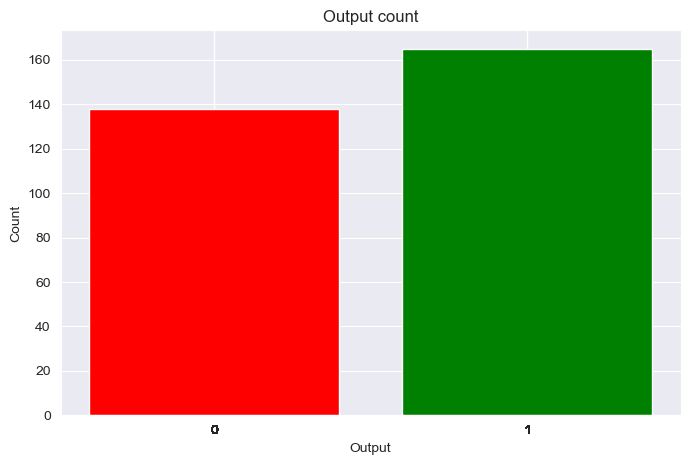

In [8]:
var_output = heart_df['output'].value_counts().index
var_count = heart_df['output'].value_counts().values
plt.bar(var_output,var_count, color = ['green', 'red'])
plt.title("Output count")
plt.xlabel("Output")
plt.ylabel("Count")
plt.xticks(heart_df['output'])
plt.show()
# Low chance of heart attack (0) and High chance of attack (1)

### Step 2
__Question:__ Is the dataset balanced? In other words, is there an equal representation of people prone to heart attacks and those who are not.

__Answer:__ This dataset is somewhat imbalanced as there are more output samples for higher chances of attack (1). There is no equal representation of people prone to heart attacks and those who are not. 

__Question:__ Is working with a balanced dataset important? Why or why not?

__Answer:__ Working with a balanced dataset is importance because an imbalance datasets can lead to bias in outcomes and afftect the performance of the classification algorithm. So it is important to have a balanced dataset so that the predictions are more accurate and the priority of the samples is equal.

__Question:__  How can we deal with an imbalanced dataset?

__Answer:__ There are several techniques to make an imbalanced dataset more balanced. We can increase the amount of samples of the smallest class to equal the size of the larger class by oversampling. We can alson in reverse undersamle by reducing the amount of sample in the larger class to match the count of the smaller class. We can also assign a weight to each class.

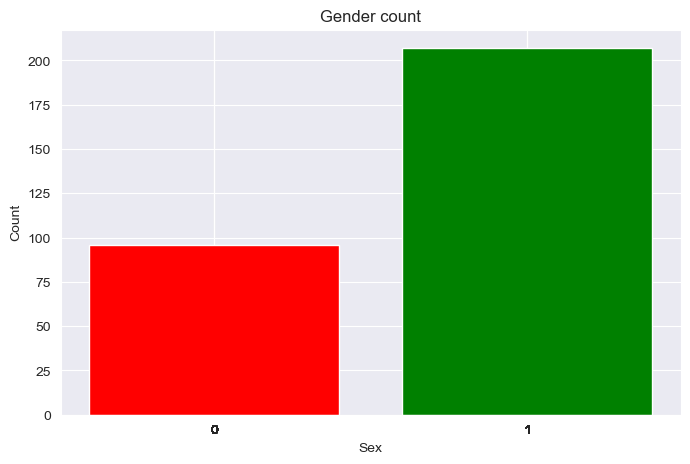

In [9]:
var_sex = heart_df['sex'].value_counts().index
var_countS = heart_df['sex'].value_counts().values
plt.bar(var_sex,var_countS, color = ['green', 'red'])
plt.title("Gender count")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(heart_df['sex'])
plt.show()

# 1 - male
# 0 - female

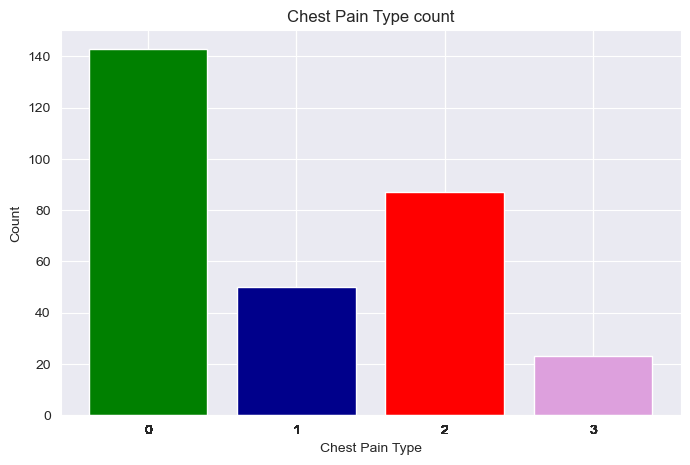

In [10]:
var_cp = heart_df['cp'].value_counts().index
var_countCp = heart_df['cp'].value_counts().values
plt.bar(var_cp,var_countCp, color = ['green', 'red','darkblue','plum'])
plt.title("Chest Pain Type count")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.xticks(heart_df['cp'])
plt.show()

# there are 4 types of chest pain

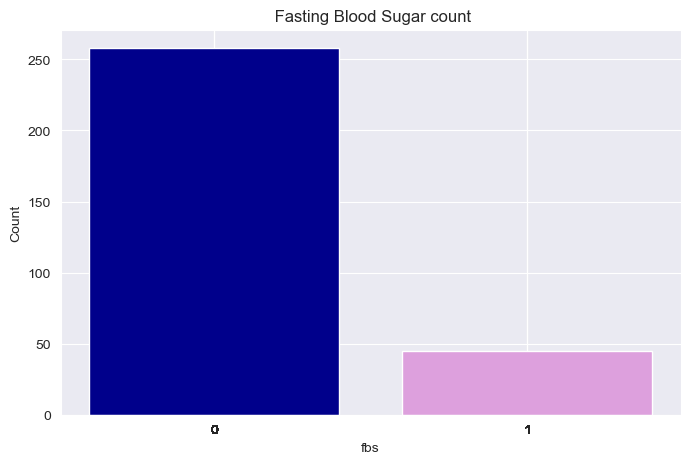

In [11]:
var_fbs = heart_df['fbs'].value_counts().index
var_countfbs = heart_df['fbs'].value_counts().values
plt.bar(var_fbs,var_countfbs, color = ['darkblue','plum'])
plt.title(" Fasting Blood Sugar count")
plt.xlabel("fbs")
plt.ylabel("Count")
plt.xticks(heart_df['fbs'])
plt.show()

# 1 - true 
# 0 - false

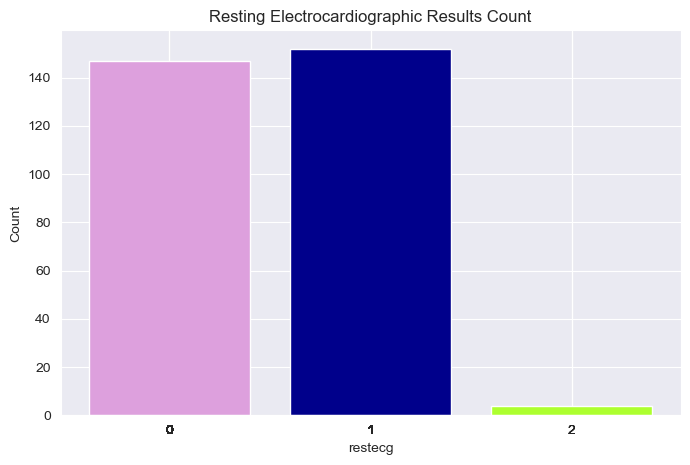

In [12]:
var_restecg = heart_df['restecg'].value_counts().index
var_countrestecg = heart_df['restecg'].value_counts().values
plt.bar(var_restecg,var_countrestecg, color = ['darkblue','plum','greenyellow'])
plt.title("Resting Electrocardiographic Results Count")
plt.xlabel("restecg")
plt.ylabel("Count")
plt.xticks(heart_df['restecg'])
plt.show()

#there are 3 types

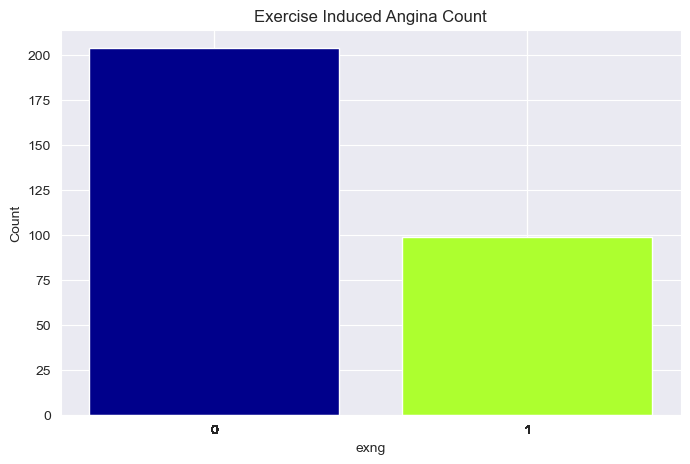

In [13]:
var_exng = heart_df['exng'].value_counts().index
var_countexng = heart_df['exng'].value_counts().values
plt.bar(var_exng,var_countexng, color = ['darkblue','greenyellow'])
plt.title("Exercise Induced Angina Count")
plt.xlabel("exng")
plt.ylabel("Count")
plt.xticks(heart_df['exng'])
plt.show()

# 1 - true (yes)
# 0 - false (no)

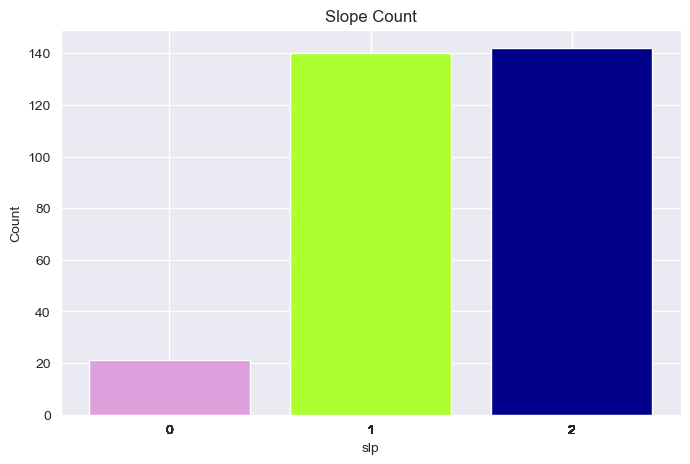

In [14]:
var_slp = heart_df['slp'].value_counts().index
var_countslp = heart_df['slp'].value_counts().values
plt.bar(var_slp, var_countslp, color = ['darkblue','greenyellow','plum'])
plt.title("Slope Count")
plt.xlabel("slp")
plt.ylabel("Count")
plt.xticks(heart_df['slp'])
plt.show()

#There are 3 types of slopes

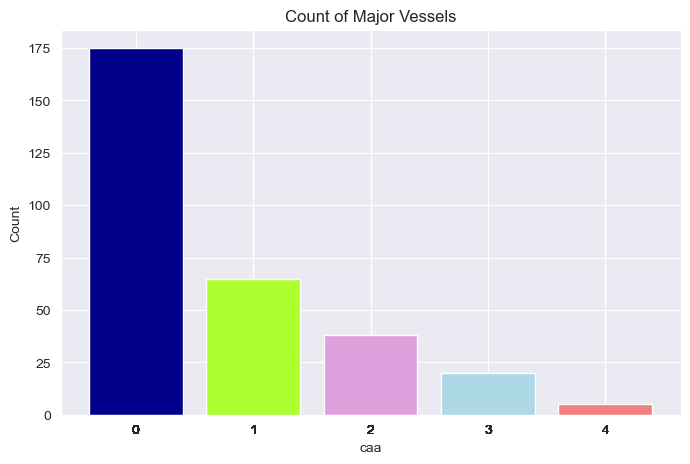

In [15]:
var_caa = heart_df['caa'].value_counts().index
var_countcaa = heart_df['caa'].value_counts().values
plt.bar(var_caa, var_countcaa, color = ['darkblue','greenyellow','plum','lightblue','lightcoral'])
plt.title("Count of Major Vessels")
plt.xlabel("caa")
plt.ylabel("Count")
plt.xticks(heart_df['caa'])
plt.show()

# There are 5 different number of major vessels 

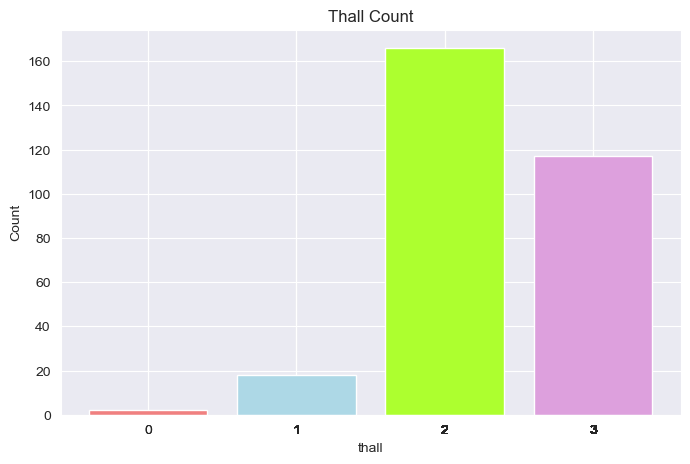

In [16]:
var_thall = heart_df['thall'].value_counts().index
var_countthall = heart_df['thall'].value_counts().values
plt.bar(var_thall, var_countthall, color = ['greenyellow','plum','lightblue','lightcoral'])
plt.title("Thall Count")
plt.xlabel("thall")
plt.ylabel("Count")
plt.xticks(heart_df['thall'])
plt.show()

# There are 4 different classifications

### Step 3

__Question:__ What can you conclude from the plots you created? Are there any interesting findings?

__Answer:__ Based on the count plots for all the categorical variables above, I made the following consclusions. Looking at the gender plot, there are more males (1's) than there are females (0's). Majority of samples have chest pain of type 0. The values of resting electrocardiographic results (restecg) is about the same between type 0 and type 1. Most samples do not have exercise induced angina (exng). The slope of type 1 and 2 have similar count. The number major vessels (caa) is of type 0 is the most and the least is type 4. The most thall is of type 2 and the least is type 0. The dependent variable (output) is unbalanced with more sample that are prone to heart attack.

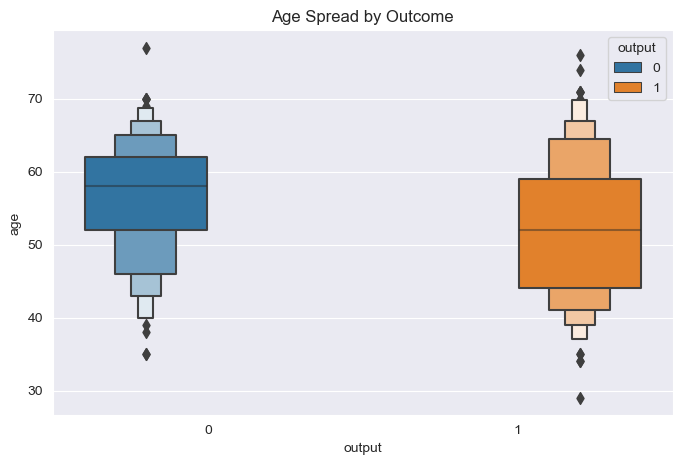

In [17]:
sns.boxenplot(x='output', y='age', hue='output', data=heart_df)
plt.title('Age Spread by Outcome')
plt.show()

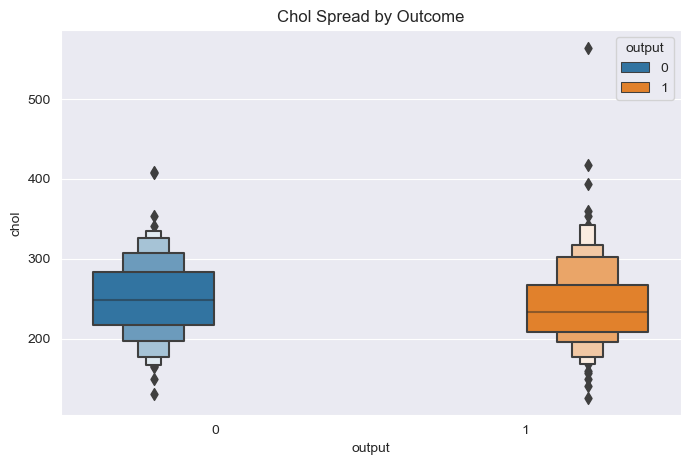

In [18]:
sns.boxenplot(x='output', y='chol', hue='output', data=heart_df)
plt.title('Chol Spread by Outcome')
plt.show()

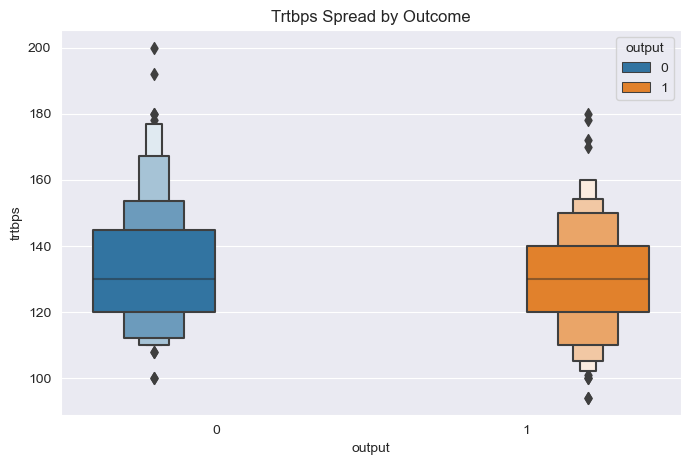

In [19]:
sns.boxenplot(x='output', y='trtbps', hue='output', data=heart_df)
plt.title('Trtbps Spread by Outcome')
plt.show()

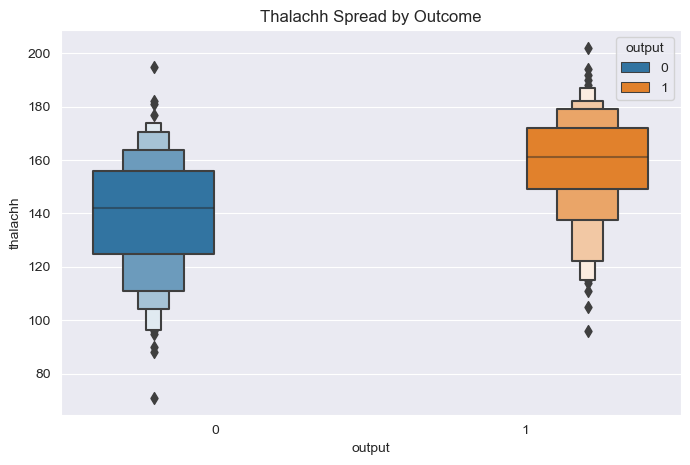

In [20]:
sns.boxenplot(x='output', y='thalachh', hue='output', data=heart_df)
plt.title('Thalachh Spread by Outcome')
plt.show()

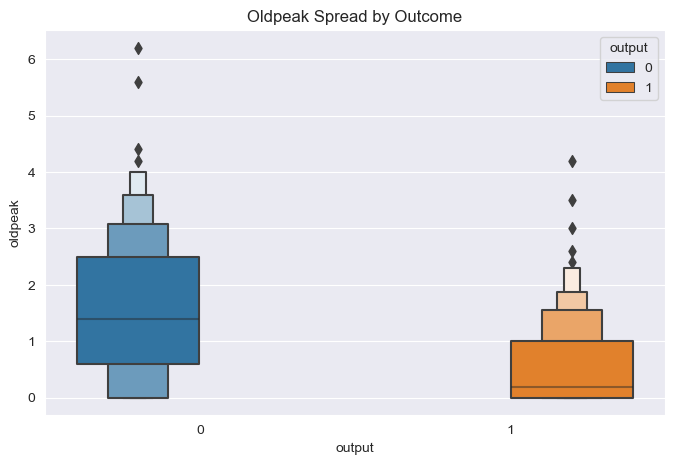

In [21]:
sns.boxenplot(x='output', y='oldpeak', hue='output', data=heart_df)
plt.title('Oldpeak Spread by Outcome')
plt.show()

### Step 4

__Question:__ What can you conclude from the plots you created? Are there any interesting findings?

__Answer:__ Based on the boxplots created for each of the continuous variavles by the outcome, I can conclude that the median age for attack is above 50 years based on Age spread by Outcome. The results of Chol spread by outcome shows a similar distrubution between the two groups. Based on Thalachh Spread by Outcome graph, the median for peopel with higher chances have a high level of thalachh heart rate. Most of the oldpeak data is concentrated below 3 excluding outliers for predictions with heart attacks. What I find interesting in Trtbps Spread by Outcome is that predictions with low chances of attack shows a spread that has high blood pressure than those prdicted with high chance of heart attack. 

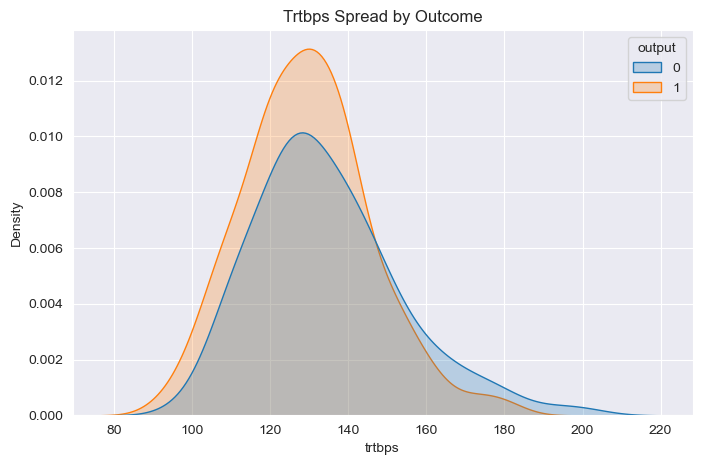

In [22]:
sns.kdeplot(data= heart_df, x='trtbps', hue='output', fill= True)
plt.title('Trtbps Spread by Outcome')
plt.show()

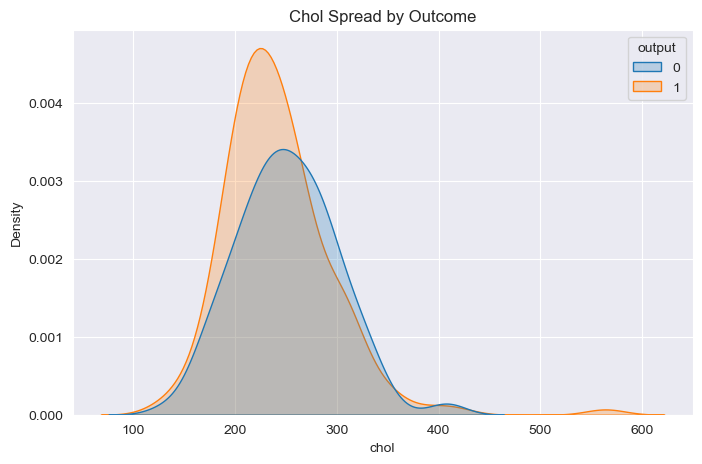

In [23]:
sns.kdeplot(data= heart_df, x='chol', hue='output', fill= True)
plt.title('Chol Spread by Outcome')
plt.show()

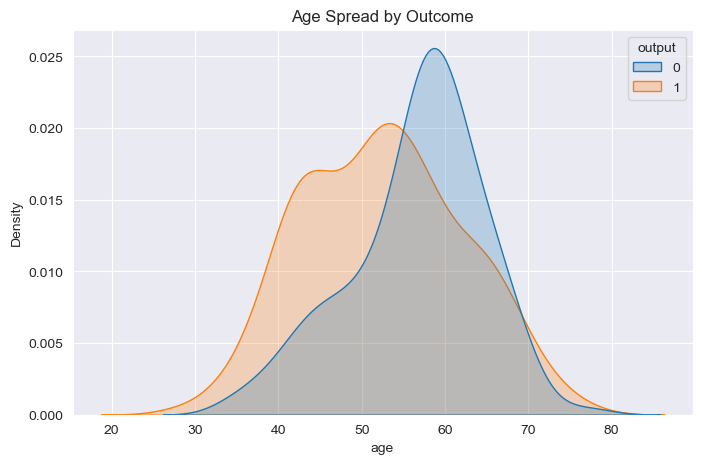

In [24]:
sns.kdeplot(data= heart_df, x='age', hue='output', fill= True)
plt.title('Age Spread by Outcome')
plt.show()

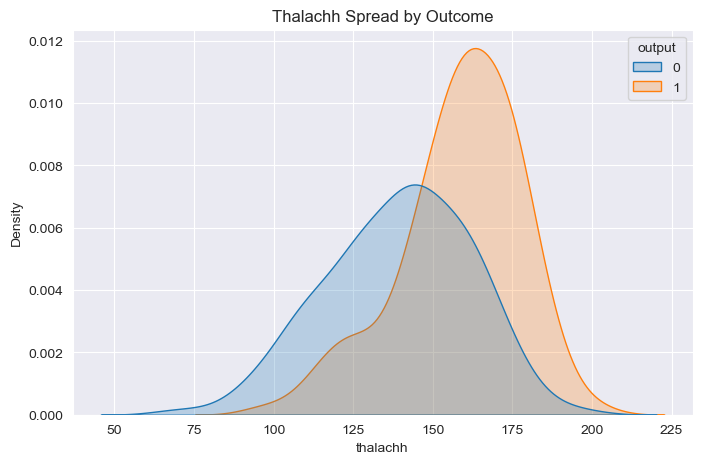

In [25]:
sns.kdeplot(data= heart_df, x='thalachh', hue='output', fill= True)
plt.title('Thalachh Spread by Outcome')
plt.show()

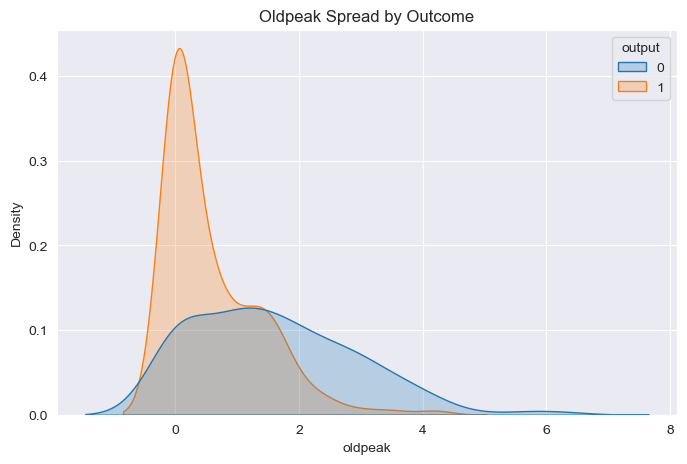

In [26]:
sns.kdeplot(data= heart_df, x='oldpeak', hue='output', fill= True)
plt.title('Oldpeak Spread by Outcome')
plt.show()

### Step 5

__Question:__ What can you conclude from the plots you created? Are there any interesting findings?

__Answer:__ Based on the graphs above, I can interpret that for trtbps plot and chol plot, there is a significant overlap between the outcome 0 and 1. This suggests that trtbps may not be a string predictor. The peaks for age spread differ and the outcome class 1 has a wider spread suggesting higher variability. The peak for thalachh is much higher for outcome class 1 than for outcome class 0, this suggests that thalachh might be a strong indicator. Same with oldpeak spread, which shows a clear difference in peak for outcome class 1 and outcome 0. What I find interesting is much of the overlap between blood pressure and cholesterol, at how similar the distribution spread if for these 2 variables. 

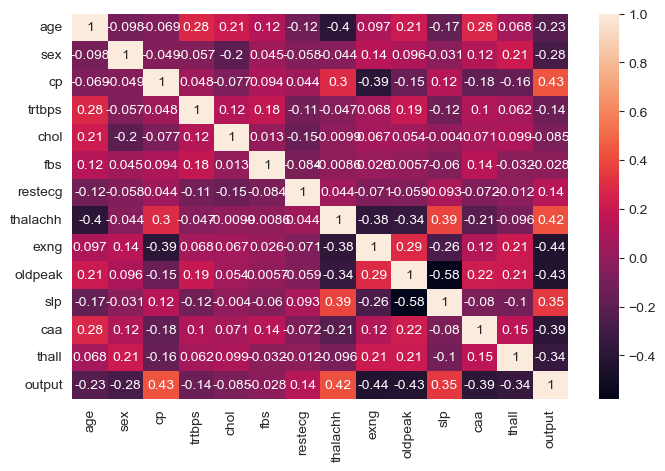

In [27]:
sns.heatmap(heart_df.corr(), annot=True) 
plt.show()

### Step 6

__Question:__ What can you conclude from the heatmap you created? Are there any interesting findings?

__Answer:__ Based on the heatmap above, there are no variables have high correlation with each other. These appears to be no case of multicollinearity as there is no correlation above 0.8 or below -0.8. Most of the variables such as age (-0.23), sex(-0.28), trtbps(-0.14), restecg(0.14) in fact show weak correlation, potentially meaning they have no influence in the prediction of the outcome. I find it interesting that age shows weak correlation though the result here is consistent with the my findings from Step 5. There is a correlation seen between slp (slope) and oldpeak. Our output has the highest correlation with exng among all variables.

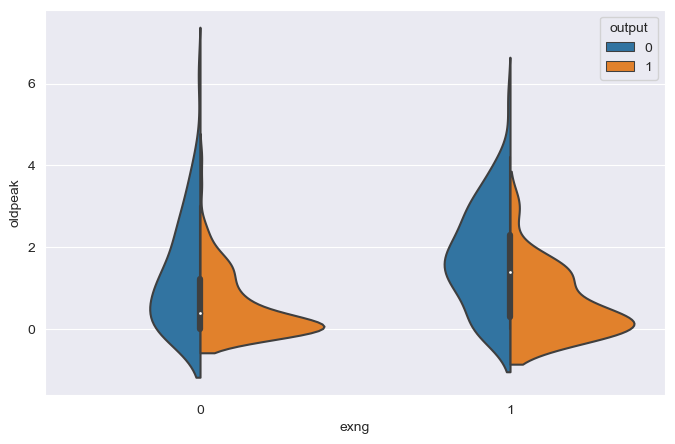

In [28]:
sns.violinplot(data = heart_df,  x = "exng", y = "oldpeak", hue = 'output', split = True)
plt.show()

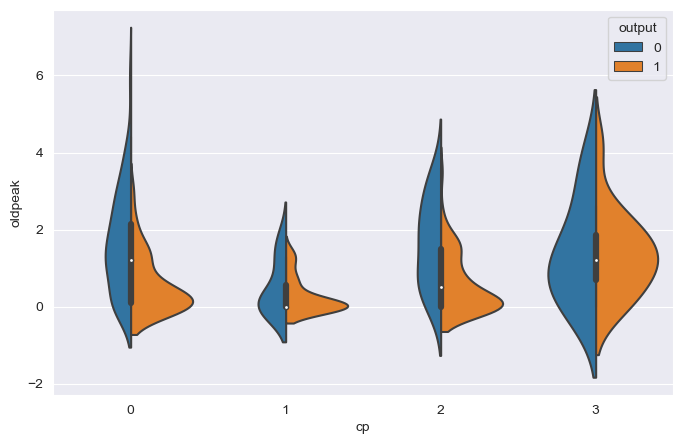

In [29]:
sns.violinplot(data = heart_df, x = "cp", y = "oldpeak", hue = 'output', split = True)
plt.show()

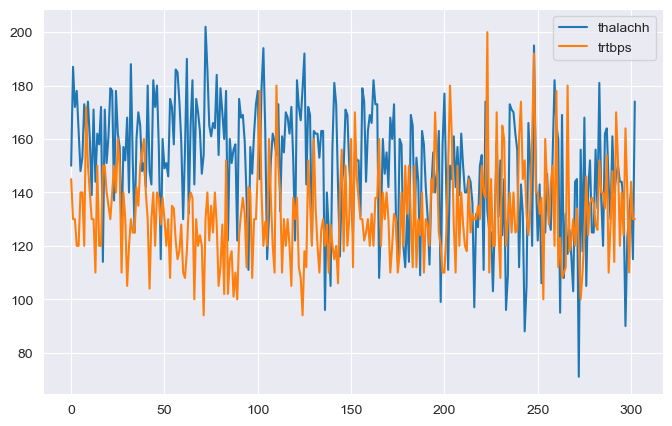

In [30]:
plt.plot(heart_df['thalachh'], label='thalachh')
plt.plot(heart_df['trtbps'], label='trtbps')
plt.legend()
plt.show()

### Step 7

__Question:__ What can you conclude from the plots that you created? Did you find anything interesting?

__Answer:__ Based on the three plots I created above, I can interpret that there is a slight overlap between the thalachh rate and trtbps levels after 200, before that the values are opposite of each other. The violinplot for exng and oldpeak by outcome shows that those both with and without exercise induced angina, patients with heart disease are more likely to have a lower oldpeak value. The distributions for those with heart disease are narrower and lower than for those without. For cp and oldpeak by outcome, it can be seen that the blue distributions, distributions of patients without heart disease, are wider than those with heart disease for every chest pain value. Further, we can see that the orange distributions, patients with heart disease, tend to have a peak value close to zero.

### Step 8

__Question:__ Name two different models that you can use to solve the problem statement.

__Answer:__ Since this is a classification problem where the prediction variable is in binary, we can use models such as logistic regression and KNN to predict if a person is prone to a heart attack or not. 

__Question:__ What is the difference between label encoding and one hot encoding, and when should you use one over the other?

__Answer:__ The difference between label encoding and one hot encoding is that label encoding creates one column with int values to represent categories. Whereas one hot encoding creates dummy variables that are binary cloumns for each category. The use of label encoding when the categorical variables are ordinal as the assigned value indicates the importance, and one hot encoding when categorical variables are nominal.

__Question:__ What is multicollinearity, and why do we care about it when creating models? How can we check to see if there’s significant multicollinearity in our data?

__Answer:__ Multicollinearity occurs when two or more independent variable show high correlations. This can lead to less reliable analysis results and also distor the outcome, which is why it is important to check for multicollinearity. Using a .Heatmap() is the best way to see if any of the variables have correlation in your datasets.

__Question:__ Why is scaling data important?

__Answer:__ Scaling data is important because it help bound the data to certain interval and makes it easier to compare different variables that might not have been measure on the same scale, but scaling puts them i a common scale. It transformas data that makes data analysis much easier.

__Question:__ For the two different models that you named earlier, are they using a parametric or non-parametric learning algorithms? What’s the difference?

__Answer:__ The 2 modeles I said I would be using are logistic regression and KNN. Logistic regression is a parametric algorithm, whereas KNN is a non-parametric algorithm. The difference is that parametric algorithm is fixed and assumes a linear relationship and is less flexible. While non-parametric algorithm makes no assumptions about the data, and it flexible.

__Question:__ Suppose that we had missing values in our dataset. What are different ways we could handle them?

__Answer:__ If there were missing values in our dataset, there are three ways we can handle them. The first one is to remove the missing observations from the dataset or simply ignore them. The second way is fill the missing values manually. Third way is data imputation by replacing null values with the columns mean.

### Step 9

Creating the 2 different models


In [31]:
#import libraries for logistic regression and knn models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

numeric_var = ['age','trtbps','chol','thalachh','oldpeak']

#one hot encoding
heart_df = pd.get_dummies(data=heart_df, columns=['sex','cp','fbs','restecg','exng','slp','caa','thall'], drop_first=True)

X = heart_df.drop(columns=['output'])
y = heart_df['output']

# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# do a 30-70 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [32]:
#Logistic Regression Model
logmodel = LogisticRegression(max_iter=150)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [33]:
predictions = logmodel.predict(X_test)

# print the classification report
print(classification_report(y_test,predictions))
# print the confusion matrix
print("Logistic Regression Confusion Matrix:\n",confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        38
           1       0.83      0.85      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Logistic Regression Confusion Matrix:
 [[29  9]
 [ 8 45]]


In [35]:
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

test_scores = []
train_scores = []

# testing k values from 1-14
for i in range(1,15):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

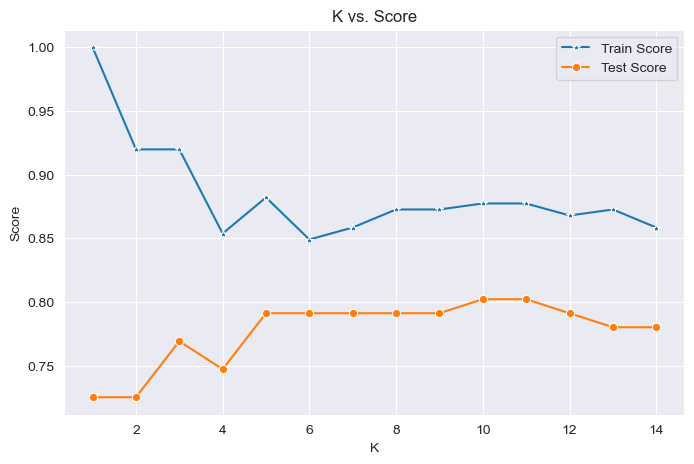

In [36]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [37]:
#train final model
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8021978021978022

In [38]:
#finally, print out a confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
# print the confusion matrix
print("KNN Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

KNN Confusion Matrix:
 [[29  9]
 [ 9 44]]


In [41]:
# Cross-validation score
log_reg = cross_val_score(logmodel, X_scaled, y, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {np.mean(log_reg):.4f}")

knn_cv = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
print(f"KNN Cross-Validation Accuracy: {np.mean(knn_cv):.4f}")

Logistic Regression Cross-Validation Accuracy: 0.8414
KNN Cross-Validation Accuracy: 0.8416


### Conclusion

Our task was to perform data exploration and build models to predict if a person is prone to heart attack or not. This is a classification task. I started out by exploring the data set using .head(), .info(), and .describe(), after meaking sure that there were no missing values I plotted some graphs to visualize the data and also used .heatmap() to check for correlation and multicollinearity. I found that there were no variable present in the dataset with high correlations. Then I created Logistic regression model and KNN model. 

Above are the results of performing Logistic Regression and KNN on this dataset to predict if a person is prone to a heart attack (0 or 1). Based on the accuracy results from the classifications reports, the confusion matrix, and the cross-validation both models performed the same in terms of how similar their accuracy and error scores are. I did sclare my data using StandardScaler() because it transforms data that have different scales. So now that I scaled my data using StandardScaler(), the features now have a mean of 0 and a standard deviation of 1. I chose logistic regression because the task of prediction is binary classification and this model would work best for it. KNN is another machine learning algorithm that I chose to predict the outcome for this dataset, as KNN is used to classify/predict data points based on its nearest neighbors. This is an alternative non-parametric algorithm I chose as logistic regression is parametric.

Both the models have a prediction accuracy of 0.84 with is good, not very very high but pretty good. Given that this is a small dataset with only 303 observations both models showed similar performances. But if the dataset were larger, the difference might have been considerible. 

